### Anomaly Detection Filter example

In [1]:
import warnings
warnings.filterwarnings('ignore')  #suppress annoying deprecation warnings

import antares_client
from antares_client.search import get_by_id

import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

plt.rc('font', size=15)
%config InlineBackend.figure_format = 'retina'  #for MacOS, make plots crisp

Note: this notebook can be run on https://datalab.noirlab.edu under quickstart --> launch a jupyter notebook 
<img src="datalab_jupyter_screenshot.png">

We can search for loci by their associated tags, where a tag is produced by a single Filter. We are interested in the newly implemented (April 5, 2021) anomaly detection filter, written by Patrick Aleo and Konstantin Malanchev on behalf of the ANTARES team. We do so using the ANTARES elastic search query:

In [2]:
%%time

query = {
    "query": {
        "term": {
            "tags": "iso_forest_anomaly_detection"
        }
    }
}
loci = antares_client.search.search(query)
locus_ids = [l.locus_id for l in loci]

CPU times: user 46.7 ms, sys: 3.26 ms, total: 49.9 ms
Wall time: 150 ms


All the ANTARES loci which successfully passes the conditions for the anomaly detection filter are collected here in a list. Because this filter is new, the amount of anomalous loci are small (22 objects):

In [3]:
locus_ids

['ANT2021ir5w4',
 'ANT2021h6cqe',
 'ANT2018fl6d6',
 'ANT2020kbvd4',
 'ANT2021iyfc6',
 'ANT2021jbiyi',
 'ANT2021imhdw',
 'ANT2020h3tgu',
 'ANT2021icbwo',
 'ANT2021i2j2i',
 'ANT2020ijdcq',
 'ANT2021ibz5q',
 'ANT2021h42ww',
 'ANT2020h63pm',
 'ANT2020atxrw',
 'ANT2021imi3y',
 'ANT2021i5u3k',
 'ANT2021izx7c',
 'ANT2021htphy',
 'ANT2020lwutu',
 'ANT2021h6ziw',
 'ANT2021ipbqa']

In [4]:
# get locus by ANTARES ID
locus = get_by_id("ANT2021ipbqa")

We can see the other tags associated with this particular locus:

In [5]:
locus.tags

['extragalactic',
 'nuclear_transient',
 'iso_forest_anomaly_detection',
 'lc_feature_extractor',
 'high_amplitude_transient_candidate']

It seems like this may be an extragalactic transient. 
Let's take a closer look at the light curve information for this locus and plot.

In [6]:
locus.lightcurve

,alert_id,ant_mjd,ant_survey,ant_ra,ant_dec,ant_passband,ant_mag,ant_magerr,ant_maglim,ant_mag_corrected,ant_magerr_corrected,ant_magulim_corrected,ant_magllim_corrected
0,ztf_upper_limit:ZTF21aaqjmnn-1510405171215,59264.405174,2,NaN,NaN,g,NaN,NaN,20.810101,NaN,NaN,NaN,NaN
1,ztf_upper_limit:ZTF21aaqjmnn-1510519901215,59264.519907,2,NaN,NaN,R,NaN,NaN,20.668600,NaN,NaN,NaN,NaN
2,ztf_upper_limit:ZTF21aaqjmnn-1512390821215,59266.390822,2,NaN,NaN,R,NaN,NaN,19.869301,NaN,NaN,NaN,NaN
3,ztf_upper_limit:ZTF21aaqjmnn-1512497611215,59266.497616,2,NaN,NaN,g,NaN,NaN,20.220100,NaN,NaN,NaN,NaN
4,ztf_upper_limit:ZTF21aaqjmnn-1514466221215,59268.466227,2,NaN,NaN,R,NaN,NaN,20.408600,NaN,NaN,NaN,NaN
5,ztf_upper_limit:ZTF21aaqjmnn-1514499541215,59268.499549,2,NaN,NaN,g,NaN,NaN,20.667900,NaN,NaN,NaN,NaN
6,ztf_upper_limit:ZTF21aaqjmnn-1516366791215,59270.366794,2,NaN,NaN,R,NaN,NaN,19.455400,NaN,NaN,NaN,NaN
7,ztf_upper_limit:ZTF21aaqjmnn-1516407161215,59270.407164,2,NaN,NaN,g,NaN,NaN,19.566500,NaN,NaN,NaN,NaN
8,ztf_upper_limit:ZTF21aaqjmnn-1518436221215,59272.436227,2,NaN,NaN,g,NaN,NaN,19.129900,NaN,NaN,NaN,NaN
9,ztf_upper_limit:ZTF21aaqjmnn-1518451241215,59272.451250,2,NaN,NaN,R,NaN,NaN,19.501699,NaN,NaN,NaN,NaN


In [7]:
df_lc = pd.DataFrame(locus.lightcurve)
# Origin or type of the Alert. 1 = ZTF Candidate, 2 = ZTF Upper Limit.
df_candidates = df_lc[df_lc['ant_survey'] == 1]
df_ulim = df_lc[df_lc['ant_survey'] == 2]

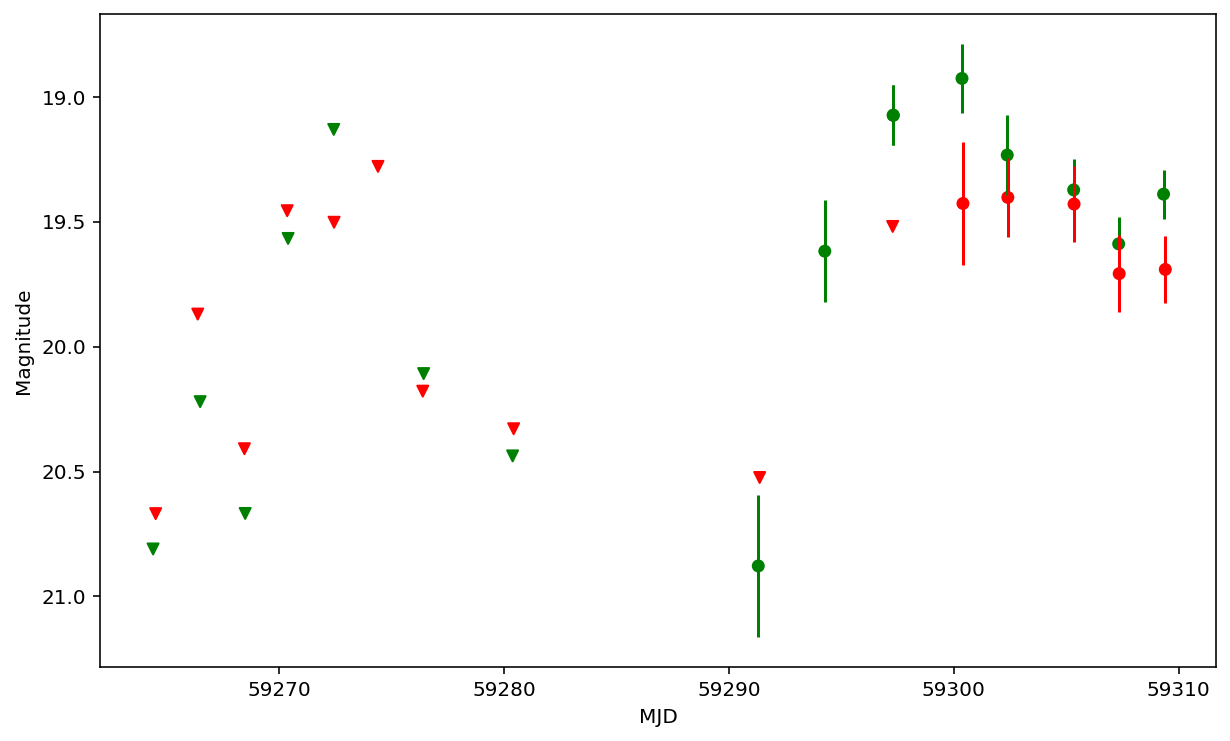

In [8]:
fig = plt.figure(figsize=(10,6))

x = df_candidates.ant_mjd
y = df_candidates.ant_mag
yerr = df_candidates.ant_magerr
c = df_candidates.ant_passband

plt.gca().invert_yaxis()
plt.scatter(x, y, c=c, marker='o', s=30)
plt.errorbar(x, y, yerr=yerr, ecolor=c, fmt='', ls='')
plt.scatter(df_ulim.ant_mjd, df_ulim.ant_maglim, c=df_ulim.ant_passband, marker='v', s=30)
plt.xlabel('MJD')
plt.ylabel('Magnitude')
plt.show()

In ~10 days, this locus rose ~ 2 mags in g-band, and is currently flattening out as of April 6, 2021.

According to the TNS page of this object: https://www.wis-tns.org/object/2021gyr, this object is a Supernova candidate as reported by the ALeRCE team. 
<img src="AT2021gyr.png">

> Note: the TNS link can be found using the TNS External Services Link attached to this locus' webpage on the ANTARES API here https://antares.noirlab.edu/loci/ANT2021ipbqa)

<img src="ZTF21aaqjmnn_ANTARES_API_screenshot.png">
 

Because this object is interesting, we should request a TOM toolkit observation to collect more data.
To do so, we should connect to TOM with our object as shown here: 
https://github.com/lchjoel1031/ANTARES/blob/main/ANTARES-TOM-AEON.ipynb